# Implementing forward propagation through a simple neural network

## 1. Introduction


In this notebook, we will implement forward propagation through a simple neural network. First let's recall some key concepts and descriptions listed below.

### 1.1 Key Concepts in Neural Networks

| **Concept**                | **Description** |
|---------------------------|-----------------|
| **Neural Network (NN)**   | A computational model inspired by the human brain, composed of layers of interconnected nodes (neurons) that transform input data to learn patterns. |
| **Fully Connected Network (FCN)** | A type of neural network in which every neuron in one layer is connected to every neuron in the next layer. It is the simplest architecture used for function approximation, classification, and regression tasks. |
| **Layer**                 | A collection of neurons that processes input data. Layers can be input, hidden, or output layers. |
| **Neuron (Unit)**         | A basic computation unit in a network. Each neuron performs a weighted sum of its inputs followed by an activation function. |
| **Weight Matrix ($\mathbf{W}$)** | A matrix that stores the trainable parameters between layers. Each element represents the strength of the connection between two neurons. |
| **Bias Vector ($\mathbf{b}$)**   | A vector added to the weighted sum to provide flexibility and improve learning. Each layer typically has its own bias vector. |
| **Forward Propagation**   | The process of computing outputs from inputs by passing data through the network's layers using weights, biases, and activation functions. |
| **Linear Transformation** | The operation $ \mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b} $, used to combine inputs using learnable parameters. |
| **Activation Function**   | A non-linear function applied to the linear output of a neuron, enabling the network to learn complex patterns. |
| **ReLU (Rectified Linear Unit)** | An activation function defined as $$ \text{ReLU}(z) = \max(0, z) $$ introducing non-linearity while maintaining computational efficiency. |
| **Softmax Function**      | Converts a vector of scores into a probability distribution:  $$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}} $$ Used in the output layer for classification. |
| **Hidden Layer**          | An intermediate layer between the input and output. Hidden layers allow the network to learn internal representations. |
| **Output Layer**          | The final layer that produces predictions. In classification tasks, this often applies softmax to yield class probabilities. |
| **Predicted Class ($\hat{y}$)** | The class with the highest predicted probability: $$ \hat{y} = \arg\max_i \mathbf{a}^{[2]}_i $$ |
| **Dimensionality**        | Refers to the number of features or units in each layer. Shapes must match for matrix operations to be valid. |
| **Matrix Multiplication** | The core operation in forward propagation, denoted $ \mathbf{W}\mathbf{x} $. Ensures linear combination of inputs. |
| **Vectorization**         | Expressing computations using matrix and vector operations to improve efficiency and code readability. |
| **Batch Processing**      | Feeding multiple inputs at once (as a matrix of inputs) to leverage parallelism during forward passes. |

### 1.2 Fully connected network (FCN) architecture

In this exercise, we will implement a **fully connected network (FCN)**, also known as a feedforward neural network. This type of network consists of layers where each neuron in one layer is connected to every neuron in the next layer.

The architecture of an FCN is defined by the following components:

- **Input dimension**: the number of features in the input vector.
- **Number of hidden layers**: intermediate layers between input and output, responsible for learning internal representations.
- **Neurons per hidden layer**: the number of units in each hidden layer.
- **Activation functions**: non-linear transformations applied after each layer to allow the network to learn complex patterns.
- **Output dimension**: the number of classes (for classification) or output values (for regression).

The code below generates an FCN with an input dimension of 2, one hidden layer with three neurons, and an output dimension of 2.

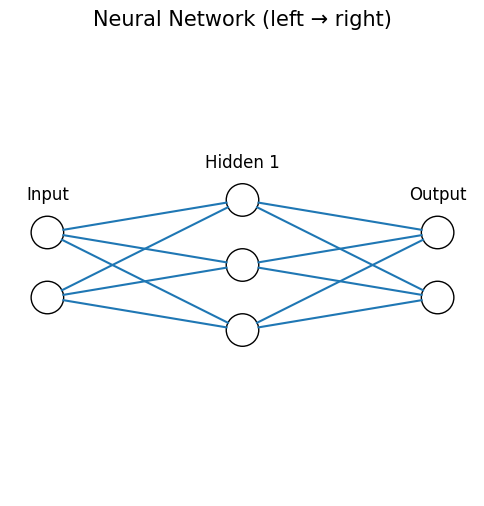

In [14]:
from utils import NeuralNetwork

nn_dim = [2, 3, 2]
nn = NeuralNetwork(nn_dim)
nn.draw()

Try changing the architecture by changing the nn_dim variable. Draw an input dimension of 3, 2 hidden layers, each with 5 neurons, and an output dimension of 2.

In [ ]:
# TODO: Change the architecture by changing the nn_dim variable.

from exercise_validator import validate_nn_architecture

nn_dim = None # You can change the architecture by changing the nn_dim variable
nn = NeuralNetwork(nn_dim)
nn.draw()

# Validate the solution
is_valid, message = validate_nn_architecture(nn_dim)
print(message)

In [ ]:
# EXERCISE SOLUTION — NOT VISIBLE TO LEARNERS
# This cell contains the reference solution and validation.
# It should be used for instructor/testing purposes only.

from exercise_validator import validate_nn_architecture

nn_dim = [3, 5, 5, 2] # You can change the architecture by changing the nn_dim variable
nn = NeuralNetwork(nn_dim)
nn.draw()

# Validate the solution
is_valid, message = validate_nn_architecture(nn_dim)
print(message)

### 1.2 Forward Propagation Through an FCN

Forward propagation is the process of passing the input through the network, layer by layer, applying linear transformations followed by activation functions, until the final output is produced.

Formally, for a fully connected network with one hidden layer, the computations proceed as follows:

- Let the input vector be $\mathbf{x} \in \mathbb{R}^{n_0}$
- Let the weight matrix and bias vector for layer 1 be:
  - $\mathbf{W}^{[1]} \in \mathbb{R}^{n_1 \times n_0}$
  - $\mathbf{b}^{[1]} \in \mathbb{R}^{n_1}$
- Let the weight matrix and bias vector for the output layer be:
  - $\mathbf{W}^{[2]} \in \mathbb{R}^{n_2 \times n_1}$
  - $\mathbf{b}^{[2]} \in \mathbb{R}^{n_2}$

The forward propagation steps are:

1. **First layer linear transformation**  
   $$
   \mathbf{z}^{[1]} = \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]}, \quad \mathbf{z}^{[1]} \in \mathbb{R}^{n_1}
   $$

2. **First layer activation (e.g., ReLU)**  
   $$
   \mathbf{a}^{[1]} = \text{ReLU}(\mathbf{z}^{[1]}), \quad \mathbf{a}^{[1]} \in \mathbb{R}^{n_1}
   $$

3. **Output layer linear transformation**  
   $$
   \mathbf{z}^{[2]} = \mathbf{W}^{[2]} \mathbf{a}^{[1]} + \mathbf{b}^{[2]}, \quad \mathbf{z}^{[2]} \in \mathbb{R}^{n_2}
   $$

4. **Output activation (e.g., softmax for classification)**  
   $$
   \mathbf{a}^{[2]} = \text{softmax}(\mathbf{z}^{[2]}), \quad \mathbf{a}^{[2]} \in \mathbb{R}^{n_2}
   $$

---

**Example:**  
Consider an FCN with:

- Input dimension: $n_0 = 3$  
- Hidden layer size: $n_1 = 4$  
- Output dimension: $n_2 = 2$  

The corresponding dimensions of the parameters and intermediate computations will be:

- $\mathbf{x} \in \mathbb{R}^{3}$  
- $\mathbf{W}^{[1]} \in \mathbb{R}^{4 \times 3}$, $\mathbf{b}^{[1]} \in \mathbb{R}^{4}$  
- $\mathbf{z}^{[1]}, \mathbf{a}^{[1]} \in \mathbb{R}^{4}$  
- $\mathbf{W}^{[2]} \in \mathbb{R}^{2 \times 4}$, $\mathbf{b}^{[2]} \in \mathbb{R}^{2}$  
- $\mathbf{z}^{[2]}, \mathbf{a}^{[2]} \in \mathbb{R}^{2}$

This setup results in a 2-dimensional output vector that can be interpreted as class probabilities in a binary classification task.

Let's assign the following values:

**Input vector:**
$$
\mathbf{x} =
\begin{bmatrix}
1.0 \\
2.0 \\
-1.0
\end{bmatrix}
$$

**Weights and biases for the hidden layer:**
$$
\mathbf{W}^{[1]} =
\begin{bmatrix}
0.2 & -0.4 & 0.1 \\
0.7 & 0.3 & -0.2 \\
-0.5 & 0.6 & 0.4 \\
0.1 & -0.1 & 0.2
\end{bmatrix},
\quad
\mathbf{b}^{[1]} =
\begin{bmatrix}
0.0 \\
0.1 \\
-0.2 \\
0.05
\end{bmatrix}
$$

Let's compute the first linear transformation using **numpy**:

In [24]:
import numpy as np

x = np.array([1.0, 2.0, -1.0])
W1 = np.array([[0.2, -0.4, 0.1], [0.7, 0.3, -0.2], [-0.5, 0.6, 0.4], [0.1, -0.1, 0.2]])
b1 = np.array([0.0, 0.1, -0.2, 0.05])
z1 = np.dot(W1, x) + b1
print(z1)


[-0.7   1.6   0.1  -0.25]


In matricial notation we have

$$
\mathbf{z}^{[1]} = \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]} =
\begin{bmatrix}
(0.2)(1.0) + (-0.4)(2.0) + (0.1)(-1.0) \\
(0.7)(1.0) + (0.3)(2.0) + (-0.2)(-1.0) \\
(-0.5)(1.0) + (0.6)(2.0) + (0.4)(-1.0) \\
(0.1)(1.0) + (-0.1)(2.0) + (0.2)(-1.0)
\end{bmatrix}
+
\begin{bmatrix}
0.0 \\
0.1 \\
-0.2 \\
0.05
\end{bmatrix}
=
\begin{bmatrix}
-0.7 \\
1.6 \\
0.1 \\
-0.25
\end{bmatrix}
$$

Apply the ReLU activation:

In [26]:
a1 = np.maximum(0, z1)
print(a1)

[0.  1.6 0.1 0. ]


$$
\mathbf{a}^{[1]} = \text{ReLU}(\mathbf{z}^{[1]}) =
\begin{bmatrix}
0.0 \\
1.6 \\
0.1 \\
0.0
\end{bmatrix}
$$

**Weights and biases for the output layer:**
$$
\mathbf{W}^{[2]} =
\begin{bmatrix}
0.5 & -0.3 & 0.8 & -0.1 \\
-0.4 & 0.6 & 0.1 & 0.2
\end{bmatrix},
\quad
\mathbf{b}^{[2]} =
\begin{bmatrix}
0.0 \\
0.05
\end{bmatrix}
$$

Let's compute the output layer transformation using **numpy**:

In [28]:
W2 = np.array([[0.5, -0.3, 0.8, -0.1], [-0.4, 0.6, 0.1, 0.2]])
b2 = np.array([0.0, 0.05])
z2 = np.dot(W2, a1) + b2
print(z2)

[-0.4   1.02]


In matricial notation we have

$$
\mathbf{z}^{[2]} = \mathbf{W}^{[2]} \mathbf{a}^{[1]} + \mathbf{b}^{[2]} =
\begin{bmatrix}
(0.5)(0.0) + (-0.3)(1.6) + (0.8)(0.1) + (-0.1)(0.0) \\
(-0.4)(0.0) + (0.6)(1.6) + (0.1)(0.1) + (0.2)(0.0)
\end{bmatrix}
+
\begin{bmatrix}
0.0 \\
0.05
\end{bmatrix}
=
\begin{bmatrix}
-0.4 \\
1.02
\end{bmatrix}
$$

Apply the softmax function:

In [29]:
a2 = np.exp(z2) / np.sum(np.exp(z2))
print(a2)


[0.19466158 0.80533842]


$$
\mathbf{a}^{[2]} = \text{softmax}(\mathbf{z}^{[2]}) =
\frac{1}{e^{-0.4} + e^{1.02}} \cdot
\begin{bmatrix}
e^{-0.4} \\
e^{1.02}
\end{bmatrix}
\approx
\begin{bmatrix}
0.195 \\
0.805
\end{bmatrix}
$$

## 2. Implement Your Own Fully Connected Network (FCN)

In this section, you will implement a simple **fully connected network (FCN)** using a class-based structure in Python. The architecture of the network is as follows:

1. **Input Layer**: 2 units, accepting a feature vector $\mathbf{x} \in \mathbb{R}^2$
2. **Hidden Layer**: 2 units with ReLU activation  
   - Linear transformation: $\mathbf{z}^{[1]} = \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]}$  
   - Activation: $\mathbf{a}^{[1]} = \text{ReLU}(\mathbf{z}^{[1]})$
3. **Output Layer**: 2 units with softmax activation  
   - Linear transformation: $\mathbf{z}^{[2]} = \mathbf{W}^{[2]} \mathbf{a}^{[1]} + \mathbf{b}^{[2]}$  
   - Activation: $\mathbf{y} = \text{softmax}(\mathbf{z}^{[2]})$

---

### ✍️ Task

Your task is to complete the class `SimpleFCN` by filling in the missing components. The class will have two main responsibilities:

---

#### 1. **Assigning Network Parameters**

Manually assign values to the weights and biases of the network using the following:

- $\mathbf{W}^{[1]} \in \mathbb{R}^{2 \times 2}, \quad \mathbf{b}^{[1]} \in \mathbb{R}^{2}$
- $\mathbf{W}^{[2]} \in \mathbb{R}^{2 \times 2}, \quad \mathbf{b}^{[2]} \in \mathbb{R}^{2}$

**Use these fixed values:**

$$
\mathbf{W}^{[1]} =
\begin{bmatrix}
0.2 & -0.4 \\
0.7 & 0.3
\end{bmatrix}, \quad
\mathbf{b}^{[1]} =
\begin{bmatrix}
0.1 \\
0.0
\end{bmatrix}
$$

$$
\mathbf{W}^{[2]} =
\begin{bmatrix}
0.5 & -0.3 \\
-0.4 & 0.6
\end{bmatrix}, \quad
\mathbf{b}^{[2]} =
\begin{bmatrix}
0.0 \\
0.05
\end{bmatrix}
$$

---

#### 2. **Performing Forward Propagation**

You will implement the full forward pass from input $\mathbf{x}$ to output $\mathbf{y}$ by combining the following components:

- A **linear transformation function**
- A **ReLU activation function**
- A **softmax function**
- A `forward()` method that chains all steps together

---

### 🧩 Components to Implement

1. **Parameter Initialization**  
   Use the provided values for the weights and biases of both layers.

2. **Linear Forward**  
   Implements the affine transformation:
   $$
   \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b}
   $$

3. **ReLU Activation**  
   Applies the ReLU function element-wise:
   $$
   \text{ReLU}(z_i) = \max(0, z_i)
   $$

4. **Softmax Activation**  
   Converts raw scores into probabilities:
   $$
   \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
   $$

5. **Forward Pass**  
   Combine all components to compute the network output:
   $$
   \mathbf{y} = \text{softmax} \left( \mathbf{W}^{[2]} \cdot \text{ReLU}\left( \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]} \right) + \mathbf{b}^{[2]} \right)
   $$

In [30]:
import numpy as np

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # stability trick
    return exp_z / np.sum(exp_z)

def linear_forward(W, x, b):
    return np.dot(W, x) + b

class SimpleFCN:
    def __init__(self):
        # Assign fixed weights and biases for layer 1
        self.W1 = np.array([[0.2, -0.4],
                            [0.7,  0.3]])
        self.b1 = np.array([0.1, 0.0])

        # Assign fixed weights and biases for layer 2
        self.W2 = np.array([[ 0.5, -0.3],
                            [-0.4,  0.6]])
        self.b2 = np.array([0.0, 0.05])

    def forward(self, x):
        # First layer
        z1 = self.linear_forward(self.W1, x, self.b1)
        a1 = self.relu(z1)

        # Output layer
        z2 = self.linear_forward(self.W2, a1, self.b2)
        y = self.softmax(z2)
        return y

In [31]:
# Create the network
model = SimpleFCN()

# Define input vector
x = np.array([1.0, 2.0])

# Run forward pass
output = model.forward(x)
print("Output probabilities:", output)


Output probabilities: [0.22793645 0.77206355]


In [7]:
def linear_forward(x, W, b):
    """
    Implements linear forward propagation: z = Wx + b
    Args:
        x: input vector (n,)
        W: weight matrix (m,n)
        b: bias vector (m,)
    Returns:
        z: output vector (m,)
    """
    return np.dot(W, x) + b

In [8]:
def relu(z):
    return np.maximum(0, z)

In [9]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

In [10]:
def forward_pass(x, W1, b1, W2, b2):
    # First layer
    z1 = linear_forward(x, W1, b1)
    a1 = relu(z1)
    
    # Second layer
    z2 = linear_forward(a1, W2, b2)
    output = softmax(z2)
    
    return output

### 2.1 Testing Your Implementation

In [11]:
def test_linear_forward():
    print("🔍 Testing: linear_forward...")
    x = np.array([1.0, 2.0])
    W = np.array([[1.0, -1.0], [0.5, 2.0]])
    b = np.array([0.0, 1.0])
    result = linear_forward(x, W, b)
    
    expected = np.array([-1.0, 5.5])
    
    assert isinstance(result, np.ndarray), "❌ Output is not a NumPy array."
    assert result.shape == expected.shape, f"❌ Expected shape {expected.shape}, got {result.shape}"
    assert np.allclose(result, expected), f"❌ Incorrect values: expected {expected}, got {result}"
    print("✅ linear_forward passed!")


def test_relu():
    print("🔍 Testing: relu...")
    z = np.array([-1.0, 0.0, 2.5])
    result = relu(z)
    expected = np.array([0.0, 0.0, 2.5])
    
    assert np.allclose(result, expected), f"❌ ReLU failed: expected {expected}, got {result}"
    print("✅ relu passed!")


def test_softmax():
    print("🔍 Testing: softmax...")
    z = np.array([1.0, 2.0, 3.0])
    result = softmax(z)
    expected = np.exp(z) / np.sum(np.exp(z))
    
    assert np.allclose(result, expected, atol=1e-6), "❌ Softmax values are incorrect."
    assert np.isclose(np.sum(result), 1.0), "❌ Softmax output does not sum to 1."
    print("✅ softmax passed!")


def test_forward_pass():
    print("🔍 Testing: forward_pass...")
    x = np.array([1.0, 2.0])
    W1 = np.array([[1.0, -1.0], [0.5, 2.0]])
    b1 = np.array([0.0, 1.0])
    W2 = np.array([[1.0, 2.0], [-1.0, 1.0]])
    b2 = np.array([0.0, 0.0])
    
    output = forward_pass(x, W1, b1, W2, b2)

    assert isinstance(output, np.ndarray), "❌ Output must be a NumPy array."
    assert output.shape == (2,), f"❌ Expected output shape (2,), got {output.shape}"
    assert np.isclose(np.sum(output), 1.0, atol=1e-6), "❌ Output probabilities must sum to 1."
    assert np.all(output >= 0), "❌ Output contains negative probabilities."
    print("✅ forward_pass passed!")


# Run all tests
def run_all_tests():
    print("🏁 Running all unit tests...\n")
    test_linear_forward()
    test_relu()
    test_softmax()
    test_forward_pass()
    print("\n🎉 All tests completed!")

# Call this to test all at once:
run_all_tests()


🏁 Running all unit tests...

🔍 Testing: linear_forward...
✅ linear_forward passed!
🔍 Testing: relu...
✅ relu passed!
🔍 Testing: softmax...
✅ softmax passed!
🔍 Testing: forward_pass...
✅ forward_pass passed!

🎉 All tests completed!
